# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

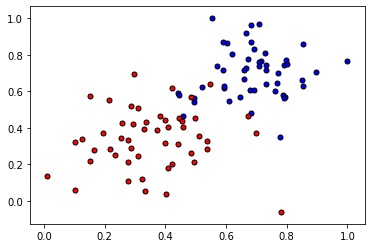

In [2]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [6]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [7]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


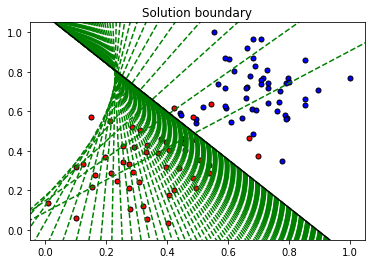

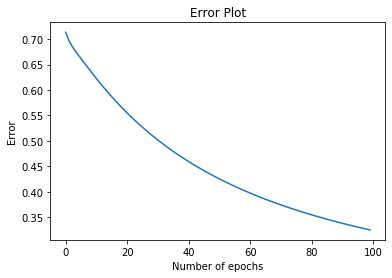

In [8]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6619731146290033
Accuracy:  0.62

========== Epoch 10 ==========
Train loss:  0.5897532423461566
Accuracy:  0.66

========== Epoch 20 ==========
Train loss:  0.5303860888972776
Accuracy:  0.78

========== Epoch 30 ==========
Train loss:  0.4833299834800748
Accuracy:  0.85

========== Epoch 40 ==========
Train loss:  0.44556544090744593
Accuracy:  0.88

========== Epoch 50 ==========
Train loss:  0.4147782418517366
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3892960287860786
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.36790786778423945
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.34972792464141306
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3340994393525674
Accuracy:  0.93


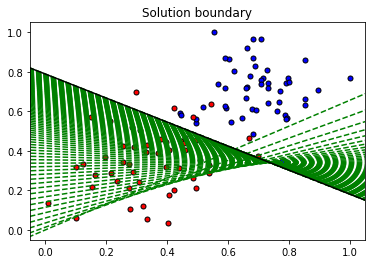

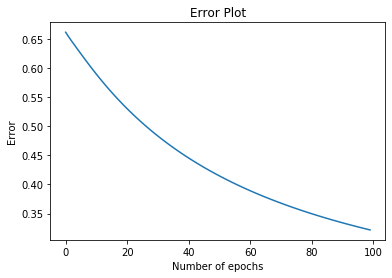

In [9]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6292681287134033
Accuracy:  0.52

========== Epoch 10 ==========
Train loss:  0.5143593197792341
Accuracy:  0.81

========== Epoch 20 ==========
Train loss:  0.4693836316800936
Accuracy:  0.91

========== Epoch 30 ==========
Train loss:  0.43367711754484867
Accuracy:  0.93

========== Epoch 40 ==========
Train loss:  0.4045342199082416
Accuracy:  0.92

========== Epoch 50 ==========
Train loss:  0.38037396490488035
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.3600626158140994
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.34277135640912
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.32788536261696954
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3149416637113466
Accuracy:  0.93


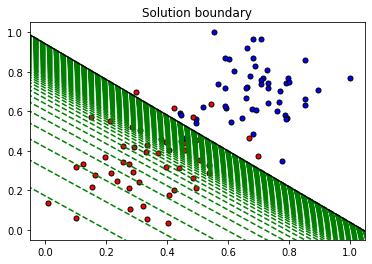

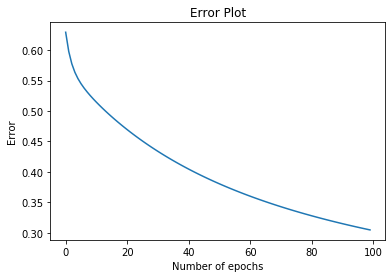

In [10]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.79763943340916
Accuracy:  0.43

========== Epoch 10 ==========
Train loss:  0.6584799730444435
Accuracy:  0.52

========== Epoch 20 ==========
Train loss:  0.5839336970325659
Accuracy:  0.67

========== Epoch 30 ==========
Train loss:  0.5252549177902461
Accuracy:  0.78

========== Epoch 40 ==========
Train loss:  0.47890116030011964
Accuracy:  0.85

========== Epoch 50 ==========
Train loss:  0.44171940923149355
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.4114127393345962
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.38632862165664383
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.36527286658231
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.34737296697820236
Accuracy:  0.93


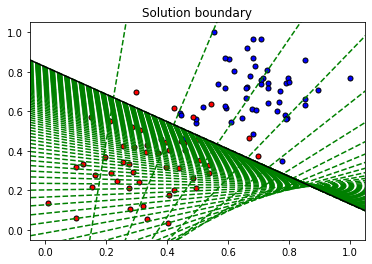

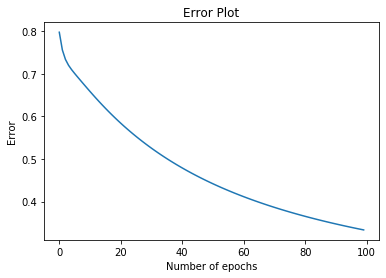

In [11]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.7043780150257064
Accuracy:  0.31

========== Epoch 10 ==========
Train loss:  0.6163340057066822
Accuracy:  0.55

========== Epoch 20 ==========
Train loss:  0.5501372859896251
Accuracy:  0.73

========== Epoch 30 ==========
Train loss:  0.498041840009345
Accuracy:  0.85

========== Epoch 40 ==========
Train loss:  0.4566542222224499
Accuracy:  0.91

========== Epoch 50 ==========
Train loss:  0.4232418346203115
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3958344279540957
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.37301562763453466
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35375852074889846
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.33730889845434375
Accuracy:  0.93


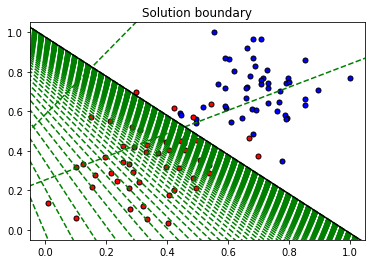

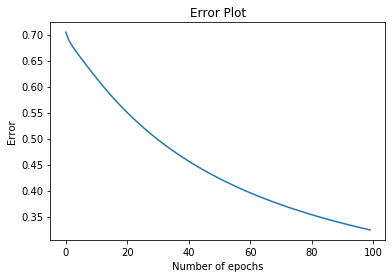

In [12]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6421088391977083
Accuracy:  0.51

========== Epoch 10 ==========
Train loss:  0.5694143787753849
Accuracy:  0.71

========== Epoch 20 ==========
Train loss:  0.513145873185152
Accuracy:  0.83

========== Epoch 30 ==========
Train loss:  0.4686792892861609
Accuracy:  0.88

========== Epoch 40 ==========
Train loss:  0.43296926188984186
Accuracy:  0.93

========== Epoch 50 ==========
Train loss:  0.4038251698162646
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.37967400136774015
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.3593789633591534
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3421087222748474
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.327246623288044
Accuracy:  0.93


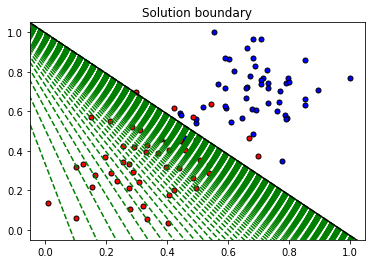

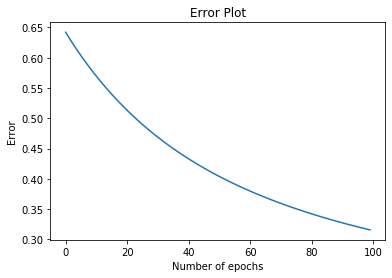

In [13]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6618619516667402
Accuracy:  0.55

========== Epoch 10 ==========
Train loss:  0.5880667999302024
Accuracy:  0.69

========== Epoch 20 ==========
Train loss:  0.5277537710864928
Accuracy:  0.8

========== Epoch 30 ==========
Train loss:  0.48017873799440575
Accuracy:  0.86

========== Epoch 40 ==========
Train loss:  0.44214538702902473
Accuracy:  0.88

========== Epoch 50 ==========
Train loss:  0.41125012338858014
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.38576255888828065
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.36443379716051516
Accuracy:  0.94

========== Epoch 80 ==========
Train loss:  0.3463531154749525
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.33084739204151686
Accuracy:  0.94


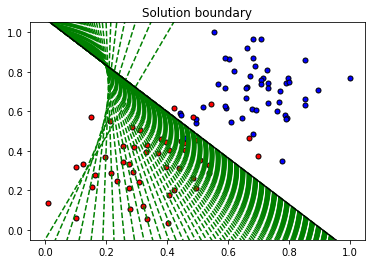

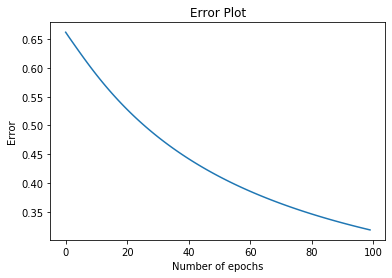

In [14]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6595244075521571
Accuracy:  0.52

========== Epoch 10 ==========
Train loss:  0.5862296913693561
Accuracy:  0.68

========== Epoch 20 ==========
Train loss:  0.5263526455354043
Accuracy:  0.8

========== Epoch 30 ==========
Train loss:  0.47911575312026605
Accuracy:  0.86

========== Epoch 40 ==========
Train loss:  0.4413396864983926
Accuracy:  0.9

========== Epoch 50 ==========
Train loss:  0.4106397938674921
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.3853009966613936
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.3640860849600228
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3460930472361803
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3306551986352337
Accuracy:  0.94


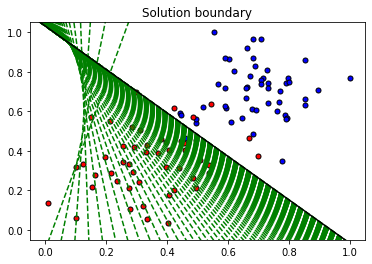

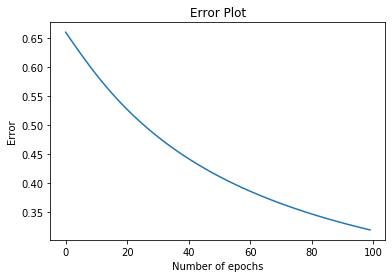

In [15]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.72595505098963
Accuracy:  0.32

========== Epoch 10 ==========
Train loss:  0.6272561253387937
Accuracy:  0.57

========== Epoch 20 ==========
Train loss:  0.5592153871038026
Accuracy:  0.73

========== Epoch 30 ==========
Train loss:  0.5056203394556301
Accuracy:  0.82

========== Epoch 40 ==========
Train loss:  0.46307407858350097
Accuracy:  0.89

========== Epoch 50 ==========
Train loss:  0.4287583913911248
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.40063584498540245
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.37724127058756146
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3575129600939288
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.34067186961370916
Accuracy:  0.93


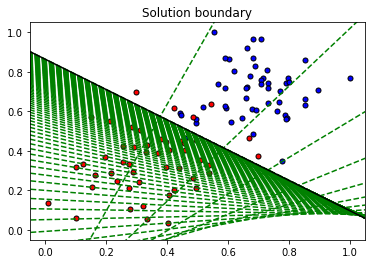

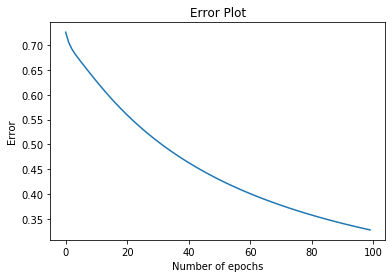

In [16]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.660602765764638
Accuracy:  0.6

========== Epoch 10 ==========
Train loss:  0.588271002340073
Accuracy:  0.66

========== Epoch 20 ==========
Train loss:  0.5288650886008711
Accuracy:  0.77

========== Epoch 30 ==========
Train loss:  0.4818497043951399
Accuracy:  0.85

========== Epoch 40 ==========
Train loss:  0.44416073329571754
Accuracy:  0.91

========== Epoch 50 ==========
Train loss:  0.41346300706991357
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3880732669077425
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.366775099812021
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3486801022726896
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3331304875024734
Accuracy:  0.93


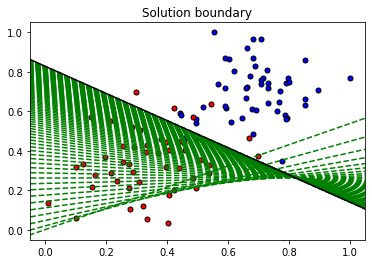

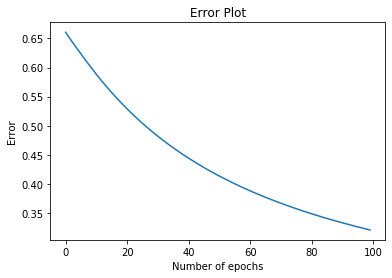

In [17]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6485503629428162
Accuracy:  0.51

========== Epoch 10 ==========
Train loss:  0.5758267908604341
Accuracy:  0.71

========== Epoch 20 ==========
Train loss:  0.5181272721431843
Accuracy:  0.8

========== Epoch 30 ==========
Train loss:  0.4725646454398106
Accuracy:  0.86

========== Epoch 40 ==========
Train loss:  0.4360357069086124
Accuracy:  0.92

========== Epoch 50 ==========
Train loss:  0.4062752208324189
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.3816549014690666
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.3609983966729092
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.34344622824157933
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3283616421568276
Accuracy:  0.94


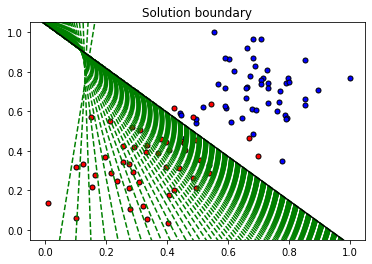

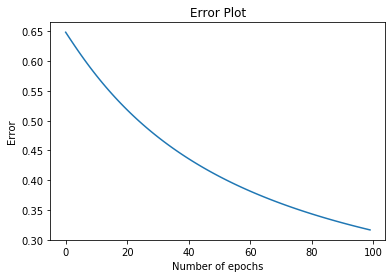

In [18]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6292879204134271
Accuracy:  0.52

========== Epoch 10 ==========
Train loss:  0.5539527004683209
Accuracy:  0.74

========== Epoch 20 ==========
Train loss:  0.5013575156467129
Accuracy:  0.83

========== Epoch 30 ==========
Train loss:  0.45965188137253327
Accuracy:  0.91

========== Epoch 40 ==========
Train loss:  0.425968249736327
Accuracy:  0.93

========== Epoch 50 ==========
Train loss:  0.3983257229656995
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.37530132158749674
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.35586297728043276
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.33925246637694806
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.32490456418034697
Accuracy:  0.93


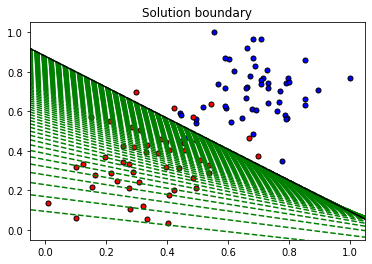

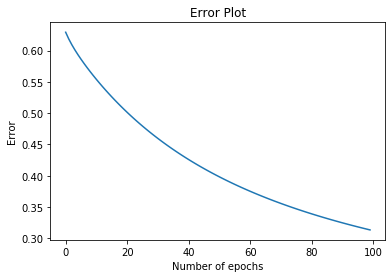

In [19]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.7204341018578573
Accuracy:  0.36

========== Epoch 10 ==========
Train loss:  0.6258572416278647
Accuracy:  0.57

========== Epoch 20 ==========
Train loss:  0.5574594397811168
Accuracy:  0.72

========== Epoch 30 ==========
Train loss:  0.503670742506869
Accuracy:  0.83

========== Epoch 40 ==========
Train loss:  0.4610203686440599
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.4266640913741579
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3985453791350235
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.3751848927627785
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35551060752422564
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.33873609480627087
Accuracy:  0.94


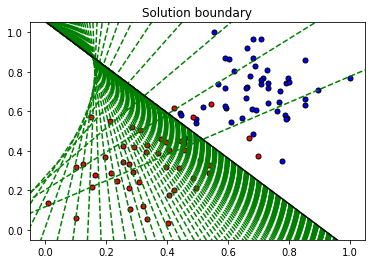

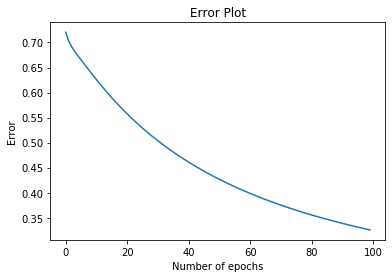

In [20]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6546396839513748
Accuracy:  0.51

========== Epoch 10 ==========
Train loss:  0.5822102052665454
Accuracy:  0.68

========== Epoch 20 ==========
Train loss:  0.5232693849561315
Accuracy:  0.8

========== Epoch 30 ==========
Train loss:  0.47674694276401774
Accuracy:  0.88

========== Epoch 40 ==========
Train loss:  0.43950355999808927
Accuracy:  0.92

========== Epoch 50 ==========
Train loss:  0.40920279599381354
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.38416577910169175
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.3631814510093983
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.345366504107897
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.33006764550019674
Accuracy:  0.93


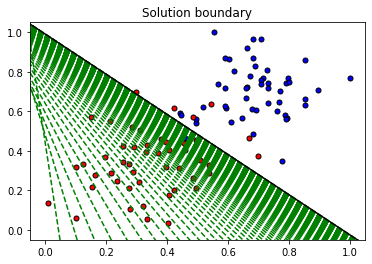

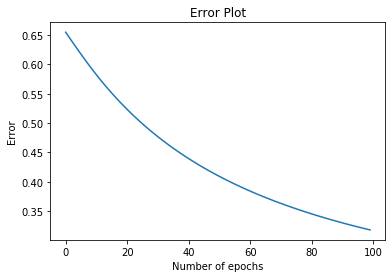

In [21]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.671512904739012
Accuracy:  0.5

========== Epoch 10 ==========
Train loss:  0.5956646752700238
Accuracy:  0.64

========== Epoch 20 ==========
Train loss:  0.533900924063884
Accuracy:  0.77

========== Epoch 30 ==========
Train loss:  0.48520844480213116
Accuracy:  0.87

========== Epoch 40 ==========
Train loss:  0.44634895287066895
Accuracy:  0.91

========== Epoch 50 ==========
Train loss:  0.41483164489892693
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3888649509750222
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.3671586546446979
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3487741192292358
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3330191419560032
Accuracy:  0.93


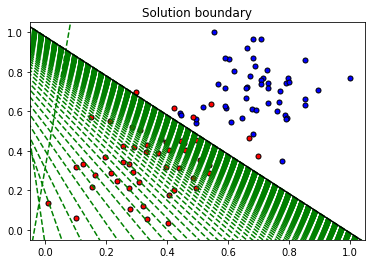

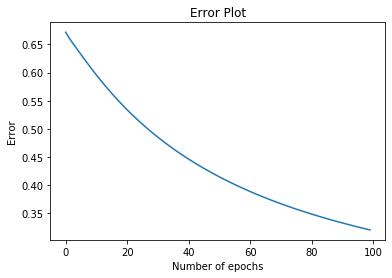

In [22]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.7284990434123004
Accuracy:  0.36

========== Epoch 10 ==========
Train loss:  0.6288123475503844
Accuracy:  0.52

========== Epoch 20 ==========
Train loss:  0.5599976332367449
Accuracy:  0.7

========== Epoch 30 ==========
Train loss:  0.5058806267429071
Accuracy:  0.82

========== Epoch 40 ==========
Train loss:  0.4629889804768386
Accuracy:  0.91

========== Epoch 50 ==========
Train loss:  0.4284480509881603
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.4001814441798303
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.37669768082119737
Accuracy:  0.92

========== Epoch 80 ==========
Train loss:  0.3569173766350638
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3400495751110927
Accuracy:  0.93


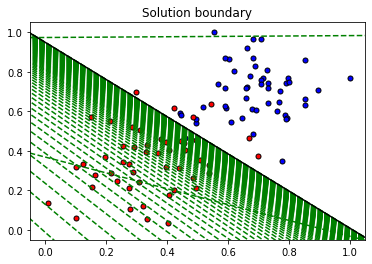

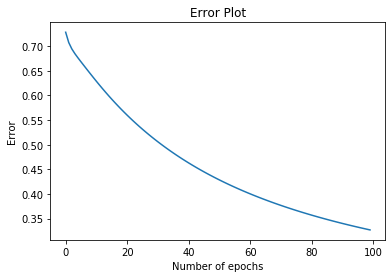

In [23]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.7554145376990661
Accuracy:  0.43

========== Epoch 10 ==========
Train loss:  0.6414593372634734
Accuracy:  0.51

========== Epoch 20 ==========
Train loss:  0.5698837793688863
Accuracy:  0.7

========== Epoch 30 ==========
Train loss:  0.5136410528218386
Accuracy:  0.82

========== Epoch 40 ==========
Train loss:  0.4691737035053874
Accuracy:  0.89

========== Epoch 50 ==========
Train loss:  0.43345759078110563
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.4043032220677321
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.38013856582406297
Accuracy:  0.92

========== Epoch 80 ==========
Train loss:  0.35982780244644097
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3425404355470876
Accuracy:  0.93


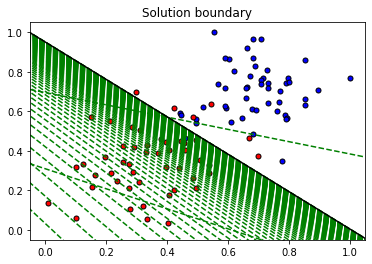

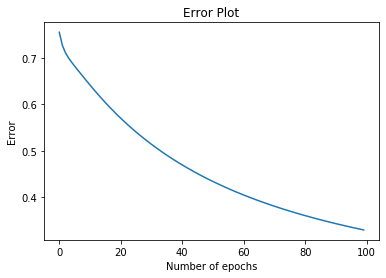

In [24]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.7086314703431336
Accuracy:  0.16

========== Epoch 10 ==========
Train loss:  0.6183825050070227
Accuracy:  0.55

========== Epoch 20 ==========
Train loss:  0.5519431270482975
Accuracy:  0.72

========== Epoch 30 ==========
Train loss:  0.49963556763171724
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4580774955778045
Accuracy:  0.91

========== Epoch 50 ==========
Train loss:  0.42452573217348766
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.39700188773926004
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.37408390793360285
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3547409563922324
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3382160742727629
Accuracy:  0.93


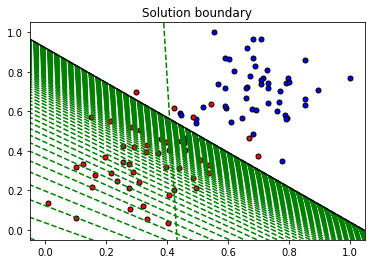

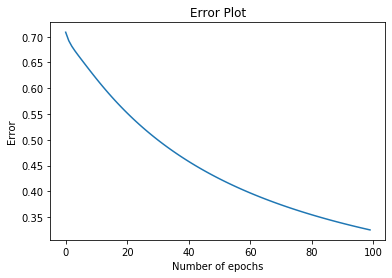

In [25]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6349492909827998
Accuracy:  0.54

========== Epoch 10 ==========
Train loss:  0.5047062599845256
Accuracy:  0.81

========== Epoch 20 ==========
Train loss:  0.46216961985110244
Accuracy:  0.86

========== Epoch 30 ==========
Train loss:  0.4283052197257212
Accuracy:  0.93

========== Epoch 40 ==========
Train loss:  0.4004952786121697
Accuracy:  0.92

========== Epoch 50 ==========
Train loss:  0.37730968716851104
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.35772003997808405
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.34096961575151064
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.32649336529564793
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.31386311678559736
Accuracy:  0.93


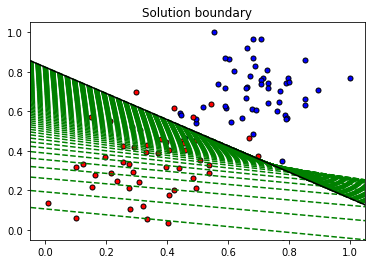

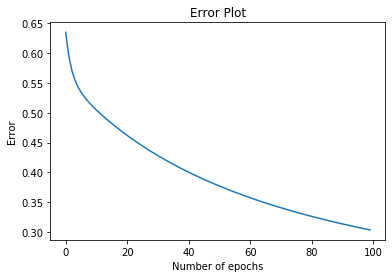

In [26]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6382432802426788
Accuracy:  0.5

========== Epoch 10 ==========
Train loss:  0.5661886879153852
Accuracy:  0.71

========== Epoch 20 ==========
Train loss:  0.5108501119928267
Accuracy:  0.82

========== Epoch 30 ==========
Train loss:  0.4670645940537989
Accuracy:  0.91

========== Epoch 40 ==========
Train loss:  0.4318468013674865
Accuracy:  0.93

========== Epoch 50 ==========
Train loss:  0.4030596126054267
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.37916864594496374
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.3590643870735148
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3419346959674433
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.327176475599125
Accuracy:  0.93


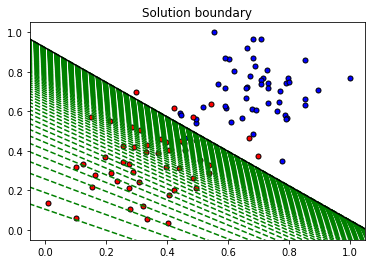

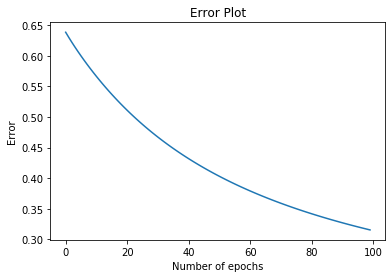

In [27]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.623457628610785
Accuracy:  0.51

========== Epoch 10 ==========
Train loss:  0.5325943900594747
Accuracy:  0.76

========== Epoch 20 ==========
Train loss:  0.4842473172154192
Accuracy:  0.85

========== Epoch 30 ==========
Train loss:  0.44585421881826043
Accuracy:  0.91

========== Epoch 40 ==========
Train loss:  0.4146648993577323
Accuracy:  0.93

========== Epoch 50 ==========
Train loss:  0.38892466282074756
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.3673737885169936
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.349094778338482
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.33341004520117534
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.31981168612676675
Accuracy:  0.93


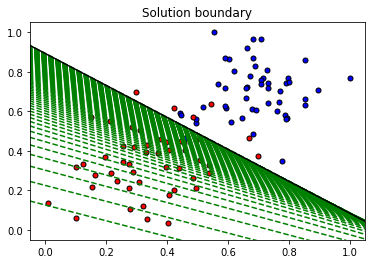

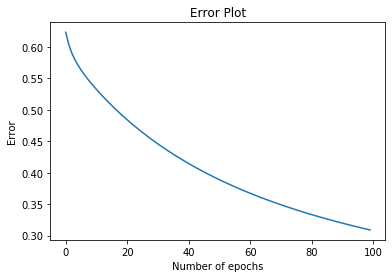

In [28]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6390103122457487
Accuracy:  0.58

========== Epoch 10 ==========
Train loss:  0.5684481034303975
Accuracy:  0.71

========== Epoch 20 ==========
Train loss:  0.513389464070193
Accuracy:  0.8

========== Epoch 30 ==========
Train loss:  0.46968338058725806
Accuracy:  0.85

========== Epoch 40 ==========
Train loss:  0.434439921079554
Accuracy:  0.89

========== Epoch 50 ==========
Train loss:  0.4055697157221219
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.3815662184828614
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.36133614713038315
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.34407677468656134
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.32919039186457866
Accuracy:  0.93


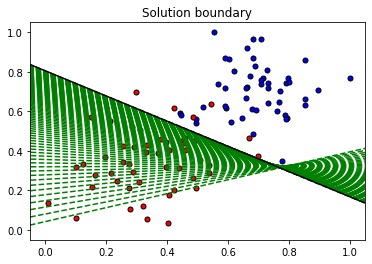

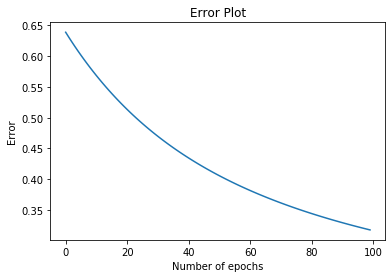

In [29]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6853351062705354
Accuracy:  0.52

========== Epoch 10 ==========
Train loss:  0.6048822024932032
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5414641814808565
Accuracy:  0.76

========== Epoch 30 ==========
Train loss:  0.4914571665485499
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.45159655899416684
Accuracy:  0.91

========== Epoch 50 ==========
Train loss:  0.41930751092346347
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3927356572555982
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.37054629760240554
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3517695391643296
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3356910868519394
Accuracy:  0.93


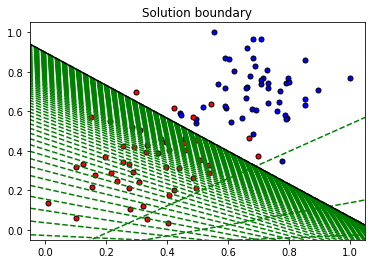

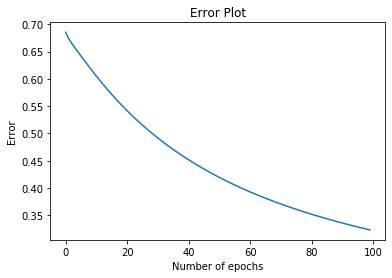

In [30]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.7528002678342645
Accuracy:  0.42

========== Epoch 10 ==========
Train loss:  0.6403861532041367
Accuracy:  0.51

========== Epoch 20 ==========
Train loss:  0.5690141202981243
Accuracy:  0.7

========== Epoch 30 ==========
Train loss:  0.5129318793983962
Accuracy:  0.82

========== Epoch 40 ==========
Train loss:  0.46858516590778976
Accuracy:  0.88

========== Epoch 50 ==========
Train loss:  0.4329606282033567
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.40387696927020456
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.3797679583510431
Accuracy:  0.92

========== Epoch 80 ==========
Train loss:  0.35950181106671236
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.3422508429828353
Accuracy:  0.93


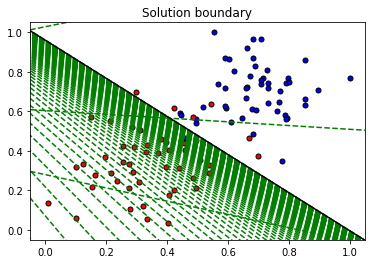

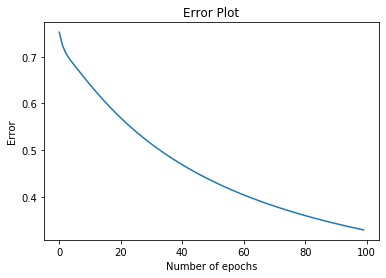

In [31]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.9405258852034432
Accuracy:  0.48

========== Epoch 10 ==========
Train loss:  0.7069264851090813
Accuracy:  0.5

========== Epoch 20 ==========
Train loss:  0.621331543434239
Accuracy:  0.56

========== Epoch 30 ==========
Train loss:  0.5541018386952536
Accuracy:  0.73

========== Epoch 40 ==========
Train loss:  0.5014527827513262
Accuracy:  0.82

========== Epoch 50 ==========
Train loss:  0.4596328468596497
Accuracy:  0.91

========== Epoch 60 ==========
Train loss:  0.4258740958338166
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3981842230200715
Accuracy:  0.92

========== Epoch 80 ==========
Train loss:  0.37513098619069984
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.35567617079589003
Accuracy:  0.93


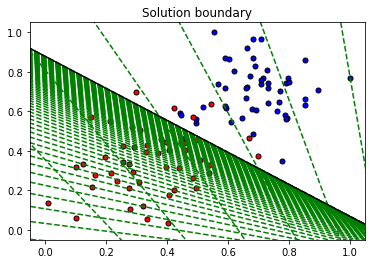

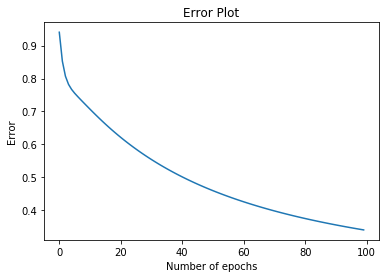

In [32]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.8512199634961959
Accuracy:  0.48

========== Epoch 10 ==========
Train loss:  0.6789512641610115
Accuracy:  0.5

========== Epoch 20 ==========
Train loss:  0.5991642905079011
Accuracy:  0.63

========== Epoch 30 ==========
Train loss:  0.5365524704422147
Accuracy:  0.77

========== Epoch 40 ==========
Train loss:  0.4873627858627263
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.44813359287122073
Accuracy:  0.91

========== Epoch 60 ==========
Train loss:  0.41633535703440666
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3901513319419243
Accuracy:  0.92

========== Epoch 80 ==========
Train loss:  0.36827378151768764
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.34975189481354974
Accuracy:  0.93


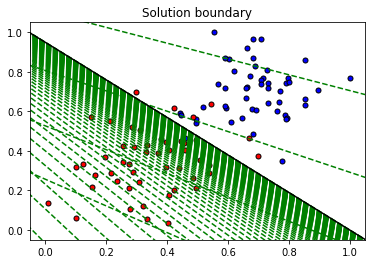

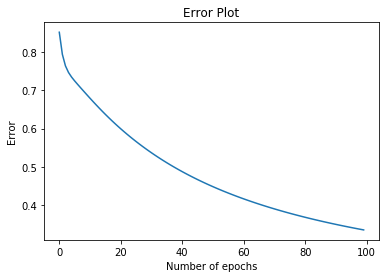

In [33]:
train(X, y, epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.6846594475278542
Accuracy:  0.5

========== Epoch 10 ==========
Train loss:  0.6044615097556452
Accuracy:  0.6

========== Epoch 20 ==========
Train loss:  0.5409395000198162
Accuracy:  0.76

========== Epoch 30 ==========
Train loss:  0.49088314174629266
Accuracy:  0.86

========== Epoch 40 ==========
Train loss:  0.4510029045256539
Accuracy:  0.91

========== Epoch 50 ==========
Train loss:  0.4187129274372348
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3921517724711323
Accuracy:  0.92

========== Epoch 70 ==========
Train loss:  0.3699801384537846
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35122513926359483
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.33517053461424917
Accuracy:  0.93


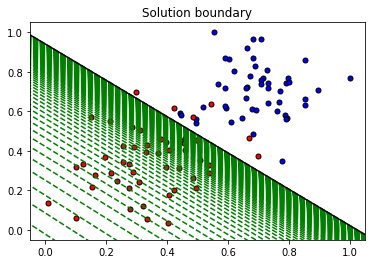

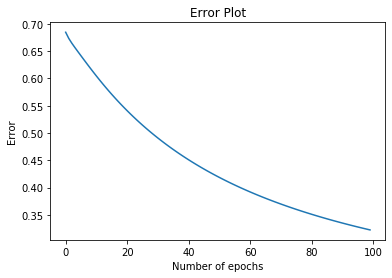

In [34]:
train(X, y, epochs, learnrate, True)

https://www.youtube.com/watch?time_continue=5&v=FWN3Sw5fFoM&feature=emb_logo

In [38]:
w1 = 3
w2 = 5
b = -2.2


print(sigmoid(w1*0.4 + w2*0.6 + b))

0.8807970779778823
